# 0. SOME PRELIMINARIES 

In [1]:
#
#Written By: Alessandro La Corte
#Important Note:
# Sklearn version: 0.18.1

# Import some libraries
import matplotlib.pyplot as plt 
# For plotting data
import numpy as np              
# For Panda dataframes. A dataframe is a matrix-like structure, 
# similar to R dataframes  
import pandas as pd

import os
os.getcwd()

'/home/alessandro/anaconda2/bin'

The "wind_pickle" file contains data in a binary format called "Pickle". Pickle data loads faster than text data.

In [2]:
#Set the path of the wind_pickle 
path = '/home/alessandro/git/big-data-intelligence/wind_pickle'
data = pd.read_pickle(path)


You can visualize the attributes in the dataset. Very important, the output attribute (i.e. the value to be predicted, **energy**, is the first attribute). **Steps** represents the hours in advance of the forecast. We will not use this variable here.

In [3]:
# The dataset contains 5937 instances and 556 attributes (including 
# the outcome to be predicted)
print data.shape
data.columns.values.tolist()

(5937, 556)


['energy',
 'steps',
 'year',
 'month',
 'day',
 'hour',
 'p54.162.1',
 'p54.162.2',
 'p54.162.3',
 'p54.162.4',
 'p54.162.5',
 'p54.162.6',
 'p54.162.7',
 'p54.162.8',
 'p54.162.9',
 'p54.162.10',
 'p54.162.11',
 'p54.162.12',
 'p54.162.13',
 'p54.162.14',
 'p54.162.15',
 'p54.162.16',
 'p54.162.17',
 'p54.162.18',
 'p54.162.19',
 'p54.162.20',
 'p54.162.21',
 'p54.162.22',
 'p54.162.23',
 'p54.162.24',
 'p54.162.25',
 'p55.162.1',
 'p55.162.2',
 'p55.162.3',
 'p55.162.4',
 'p55.162.5',
 'p55.162.6',
 'p55.162.7',
 'p55.162.8',
 'p55.162.9',
 'p55.162.10',
 'p55.162.11',
 'p55.162.12',
 'p55.162.13',
 'p55.162.14',
 'p55.162.15',
 'p55.162.16',
 'p55.162.17',
 'p55.162.18',
 'p55.162.19',
 'p55.162.20',
 'p55.162.21',
 'p55.162.22',
 'p55.162.23',
 'p55.162.24',
 'p55.162.25',
 'cape.1',
 'cape.2',
 'cape.3',
 'cape.4',
 'cape.5',
 'cape.6',
 'cape.7',
 'cape.8',
 'cape.9',
 'cape.10',
 'cape.11',
 'cape.12',
 'cape.13',
 'cape.14',
 'cape.15',
 'cape.16',
 'cape.17',
 'cape.18',
 'ca

Below, data is going to be separated in train, validation, and test. Given that the use of Pandas dataframes is quite advanced, and doing this for you:

In [4]:
indicesTrain = (np.where(data.year<=2006))[0]
indicesVal = (np.where((data.year==2007) | (data.year==2008)))[0]
indicesTest = (np.where(data.year>=2009))[0]



Beware!, **indicesTrain** does not contain the training data, but the *indices* of the training data. For instance, the following cell means that training data is made of instance number 0, instance number 1, ..., up to instance number 2527. This will be important later.

In [5]:
indicesTrain

array([   0,    1,    2, ..., 2525, 2526, 2527])

Now, we are going to transform **data**, which is a Pandas dataframe, to **ava**, which is a NumPy matrix. The reason is that Scikit-learn uses NumPy matrices, not Panda dataframes.

In [6]:
ava = data.as_matrix()

print ava

[[  4.02710000e+02   0.00000000e+00   2.00500000e+03 ...,  -4.38873595e+00
   -4.24854022e+00  -4.10784557e+00]
 [  6.96800000e+02   6.00000000e+00   2.00500000e+03 ...,  -3.11250577e+00
   -2.97031437e+00  -2.82862189e+00]
 [  1.59115000e+03   1.20000000e+01   2.00500000e+03 ...,  -1.14727095e+00
   -9.91109865e-01  -8.34948783e-01]
 ..., 
 [  2.24060000e+02   1.20000000e+01   2.01000000e+03 ...,   2.43645125e+00
    2.56018272e+00   2.68441310e+00]
 [  3.70000000e-01   1.80000000e+01   2.01000000e+03 ...,   1.41217426e+00
    1.48651292e+00   1.56085158e+00]
 [  7.01400000e+01   0.00000000e+00   2.01000000e+03 ...,  -5.92973944e-01
   -4.69242480e-01  -3.45511016e-01]]


Now, **ava** is going to be decomposed into inputs **X** and outputs **y**. And then, into training, validation, and test. For instance, **Xava** and **yava** contain the input attributes, and the output attribute (**energy**) of the whole dataset. Please, ask yourself why the inputs use "6:" and the output use "0". **Xtrain** and **ytrain** are the same, but for the training dataset.

In [7]:
#Extract info
Xava = ava[:,6:]  #Gets the matrix from column 6 forward
yava = ava[:,0]   #Gets the energy column vector

#Extract traininig matrix
Xtrain = ava[indicesTrain,6:] #Gets the X matrix of traning data using the training indices
ytrain = ava[indicesTrain,0]  #Gets the Y column vector using the training indices

#Extract validation matrix
Xval = ava[indicesVal,6:]    #Gets the X matrix of validation data using the validation indices
yval = ava[indicesVal,0]     #Gets the Y column vector using the validation indices

#Extract test matrix
Xtest = ava[indicesTest,6:] # indices get the rows, and 6: from column 6 onwowards
ytest = ava[indicesTest,0]

The following cell defines function **mae** (Mean Absolute Error), that we will use later to measure the accuracy of models.

In [8]:
def mae(yval_pred, yval):
  val_mae = metrics.mean_absolute_error(yval_pred, yval)
  return(val_mae)

The following cell trains KNN with (Xtrain, ytrain) and evaluates it with (Xval, yval).

In [9]:
from sklearn import metrics
from sklearn import neighbors


n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
np.random.seed(0)
%time _ = knn.fit(Xtrain, ytrain)
yval_pred = knn.predict(Xval)

print "MAE for KNN with K=5 is {}".format(mae(yval_pred, yval))

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 45.8 ms
MAE for KNN with K=5 is 486.911414935


In [10]:
# In case you need help for KNN
help('sklearn.neighbors.KNeighborsRegressor')

Help on class KNeighborsRegressor in sklearn.neighbors:

sklearn.neighbors.KNeighborsRegressor = class KNeighborsRegressor(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedFloatMixin, sklearn.base.RegressorMixin)
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`k_neighbors` queries.
 |  
 |  weights : str or callable
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query p

The following cell, does hyper-parameter tuning for parameter K (n_neighbors), from 1 to 4 by 1. Please, notice that with **partitions = [(indicesTrain, indicesVal)]** we are telling **gridSearch** to use the training dataset for training the different models with the different parameters, and the validation dataset for testing. Notice that this is different to other notebooks, where crossvalidation was used for this purpose. 

In [12]:
from sklearn.grid_search import GridSearchCV

np.random.seed(0)
param_grid = {'n_neighbors': range(1,4,1)}

partitions = [(indicesTrain, indicesVal)]
knnTunning = neighbors.KNeighborsRegressor()

clf = GridSearchCV(knnTunning, 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions , verbose=1)

%time _ = clf.fit(Xava,yava)

Fitting 1 folds for each of 3 candidates, totalling 3 fits
CPU times: user 836 ms, sys: 8 ms, total: 844 ms
Wall time: 841 ms


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished


Next, we show the best K parameter and the MAE of the final model built with the best parameter.

In [13]:
print "Best K: {} and MAE for best K: {}".format(clf.best_params_, -clf.best_score_)

Best K: {'n_neighbors': 3} and MAE for best K: 503.711691044


# 1. HOW LONG DOES IT TAKE?

It is always a good idea to have some estimation of how long your machine learning algorithm is going to take. In the next two cells, try to estimate how many seconds KNN (with K=3) does it take, with only **100 instances**. With 6000 instances, it will take approximately 60 times that number. You can use **%time** for timing, as in previous cells.

In [17]:
# With 100 instances

#Define the number of neighbors
n_neighbors_speed = 3

#Define the KNN object
knn_speed = neighbors.KNeighborsRegressor(n_neighbors_speed, weights='uniform')

np.random.seed(0)

#Measure the time to fit the model
%time _ = knn_speed.fit(Xtrain[0:100,], ytrain[0:100])



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 600 µs


In [18]:
# With 6.000 instances

#Define the number of neighbors
n_neighbors_speed2 = 3

#Define the KNN object
knn_speed2 = neighbors.KNeighborsRegressor(n_neighbors_speed2, weights='uniform')

np.random.seed(0)

# Measure the time to fit the model
%time _ = knn_speed2.fit(Xtrain[0:6000,:], ytrain[0:6000])



CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 30.4 ms


Please, do the same for Decision trees with default parameters

In [19]:
from sklearn import tree
#With 100 instances

#Define the Tree object
tdtr = tree.DecisionTreeRegressor()

np.random.seed(0)

#Measure the time to fit the model
%time _ = tdtr.fit(Xtrain[0:100,], ytrain[0:100])



CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 24.9 ms


In [20]:
#With 6000 instances

#Define the Tree object
tdtr2 = tree.DecisionTreeRegressor()

np.random.seed(0)

#Measure the time to fit the model
%time _ = tdtr2.fit(Xtrain[0:6000,], ytrain[0:6000])


CPU times: user 1.35 s, sys: 0 ns, total: 1.35 s
Wall time: 1.35 s


# 2. MODEL SELECTION AND HYPER-PARAMETER TUNING

Train a KNN model with default parameters

In [21]:
#Trainning a KNN regressor with default parameters

np.random.seed(0)

#define the knn object
knn = neighbors.KNeighborsRegressor()

#Train
%time _ = knn.fit(Xtrain, ytrain)

#Predict
yval_pred = knn.predict(Xval)

#Calculate the error
print "MAE for KNN with K=default(5) is {}".format(mae(yval_pred, yval))

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 39.9 ms
MAE for KNN with K=default(5) is 486.911414935


Do hyper-parameter tuning for KNN. Can you improve results? Note: if **gridSearch** takes too long, you can use **Randomized Search** instead.

In [23]:
#Hyper parameter tunning for KNN

np.random.seed(0)

#Define which attribute to tune
param_grid = {'n_neighbors': range(1,10,1),
              'algorithm' :('ball_tree', 'kd_tree', 'brute'),
              'weights' : ('uniform', 'distance')}

#Define partitions
partitions = [(indicesTrain, indicesVal)]

#Define the object
knnTunning = neighbors.KNeighborsRegressor()

#The grid search
clf = GridSearchCV(knnTunning, 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions , verbose=1)

# We fit with the whole dataset
%time _ = clf.fit(Xava,yava)

print "Best K: {} and MAE for best K: {}".format(clf.best_params_, -clf.best_score_)


Fitting 1 folds for each of 54 candidates, totalling 54 fits
CPU times: user 16.8 s, sys: 212 ms, total: 17 s
Wall time: 12 s
Best K: {'n_neighbors': 9, 'weights': 'distance', 'algorithm': 'brute'} and MAE for best K: 478.856037116


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   12.0s finished


Train a decision tree for regression with default parameters

In [20]:
# Train a Decision tree for regression with default parameters

np.random.seed(0)

#Define the object
clf = tree.DecisionTreeRegressor()

#Train
%time _  = clf.fit(Xtrain, ytrain)

#Predict
yval_pred = clf.predict(Xval)

#Calculate the Error:
print "MAE for Decision tree with regression is {}".format(mae(yval_pred, yval))

CPU times: user 1.37 s, sys: 0 ns, total: 1.37 s
Wall time: 1.37 s
MAE for Decision tree with regression is 371.829430331


Do hyper-parameter tuning for Decision trees. Can you improve results?

In [24]:
# Hyper parameter tunning for a tree decision for regression

np.random.seed(0)

#Define which attribute to tune
param_grid = {'max_depth': range(2,30, 2),
              'splitter' : ('best', 'random'),
              'max_features' : ('log2', 'sqrt', 'auto')}

#Define the partitions
partitions = [(indicesTrain, indicesVal)]

#Define the tree object
clfTunning = tree.DecisionTreeRegressor()

#Do the grid search
clf = GridSearchCV(clfTunning, 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions )

#Fit with the whole dataset
%time _ = clf.fit(Xava,yava)

#Print 
print "Best Max_Depth: {} and MAE for best Max_Depth: {}".format(clf.best_params_, -clf.best_score_)


CPU times: user 19.6 s, sys: 8 ms, total: 19.6 s
Wall time: 19.6 s
Best Max_Depth: {'max_features': 'auto', 'splitter': 'random', 'max_depth': 6} and MAE for best Max_Depth: 309.747997223


Train a Random Forest (RF) with default parameters. A RF is an ensemble technique based on Decision Trees, but instead of training just a single decision tree, it trains many of them and then computes the average of the outputs. Please, bear in mind that a RF with default parameters involves training 100 trees. You can estimate by hand how long it is going to take, and if it is excessive, you can lower the number of decision trees in the ensemble. 

In [25]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(0)

#Define the RF object
rf = RandomForestRegressor(n_estimators=100)

# Fit the model with the data
%time _ = rf.fit(Xtrain, ytrain)

#Predict the values
yval_pred_rf = rf.predict(Xval)

#Print the error:
print "MAE for Random Forest is {}".format(mae(yval_pred_rf, yval))


CPU times: user 1min 21s, sys: 24 ms, total: 1min 21s
Wall time: 1min 21s
MAE for Random Forest is 276.891711162


Do hyper-parameter tuning for Random Forests. Their main hyper-parameter is **n_estimators**, which is the number of decision trees in the ensemble. Check some values around the default value (like, 50, 100, 150, ...). Please, bear in mind this is going to take time ... In case you want to use other hyper-parameters, please ask the teacher.

In [26]:
#Hyper-parameter for Forest Regressor

np.random.seed(0)

# Attribute to tune 
param_grid_rf = {'n_estimators': [5, 10, 50, 100, 150]}

#Define the partitions
partitions = [(indicesTrain, indicesVal)]

#Define the Random Forrest Object
rf_tunning = RandomForestRegressor()

#Do the grid search
clf_rf = GridSearchCV(rf_tunning, 
                   param_grid_rf,
                   scoring='neg_mean_absolute_error',
                   cv=partitions , verbose=1)

#Train the model
%time _ = clf_rf.fit(Xava,yava)

# Print the errors
print "Best n_estimators: {} and MAE for best n_estimators: {}".format(clf_rf.best_params_, -clf_rf.best_score_)

Fitting 1 folds for each of 5 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.5min finished


CPU times: user 8min 11s, sys: 16 ms, total: 8min 11s
Wall time: 8min 11s
Best n_estimators: {'n_estimators': 100} and MAE for best n_estimators: 276.007613164


Train a Gradient Tree Boosting (GB) with default parameters. A GB is also an ensemble technique based on Decision Trees. In this case, the second decision tree tries to fix the mistakes of the first decision tree. The third decision tree tries to fix the mistakes of the first two decision trees. An so on.

Please, bear in mind that a GB with default parameters involves training 100 trees. You can estimate by hand how long it is going to take, and if it is excessive, you can lower the number of decision trees in the ensemble. 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(0)

#Define the Gradient Tree Boosting 
gb = GradientBoostingRegressor()

#Fit the model
%time _ = gb.fit(Xtrain, ytrain)

#Predict the values
yval_pred_gb = gb.predict(Xval)

#Print the errors
print "MAE for Gradient boosts with n_estimators=100 is {}".format(mae(yval_pred_gb, yval))

# help('sklearn.ensemble.GradientBoostingRegressor')


CPU times: user 10.8 s, sys: 4 ms, total: 10.8 s
Wall time: 10.8 s
MAE for Gradient boosts with n_estimators=100 is 280.827324529


Do hyper-parameter tuning for Gradient Boosting. Their main hyper-parameter is **n_estimators**, which is the number of decision trees in the ensemble. Check some values around the default value (like, 50, 100, 150, ...). Please, bear in mind this is going to take time ... In case you want to use other hyper-parameters, please ask the teacher.

In [28]:
#Hyper parameter tunning for Gradient Boosting

np.random.seed(0)

# Attribute to tune 
param_grid_rf = {'n_estimators': [5, 10, 50, 100, 150]}

#Define the partitions
partitions = [(indicesTrain, indicesVal)]

#Define the Random Forrest Object
gb_tunning = GradientBoostingRegressor()

#Do the grid search
clf_gb = GridSearchCV(gb_tunning, 
                   param_grid_rf,
                   scoring='neg_mean_absolute_error',
                   cv=partitions , verbose=1)

#Train the model
%time _ = clf_gb.fit(Xava,yava)

# Print the errors
print "Best n_estimators: {} and MAE for best n_estimators: {}".format(clf_gb.best_params_, -clf_gb.best_score_)



Fitting 1 folds for each of 5 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.4s finished


CPU times: user 41.1 s, sys: 8 ms, total: 41.1 s
Wall time: 41.1 s
Best n_estimators: {'n_estimators': 50} and MAE for best n_estimators: 279.842860355


<b> Final Model </b>

At this point, you should know which model performs best, and what hyper-parameters to use. Please, evaluate that best performing model on the test set.


We have used the traning data set with the validation set to find the best hyper-parameters, to train the final model we test it against the Test Set

In [34]:
from sklearn.ensemble import RandomForestRegressor
#The best model is the one with the lowest MAE
# This is the random forrest with n_estimators = 100

np.random.seed(0)

#Define the RF object
rf_final = RandomForestRegressor(n_estimators=100)


# Fit the model with the data
# %time _ = rf_final.fit(Xtrain, ytrain)
%time _ = rf_final.fit(Xtrain, ytrain)

#Predict the values
yval_pred_rf_final = rf_final.predict(Xtest)

#Print the error:
print "MAE for Random Forest is {}".format(mae(yval_pred_rf_final, ytest))



CPU times: user 1min 23s, sys: 12 ms, total: 1min 23s
Wall time: 1min 23s
MAE for Random Forest is 286.709622938


# 3. ATTRIBUTE SELECTION

This section is more open-ended than the previous ones, and I offer less guidance. It is definitely harder, but you can always ask the teacher. 

You have to answer the following question: 

- "Are all 550 input attributes actually necessary in order to get a good model? Is it possible to have an accurate model that uses fewer than 550 variables? How many? Is it enough to have the attributes for the actual Sotavento location? (13th in the grid)"

In order to answer this question:

1) Go through the "Attribute Selection" ipython notebook, and understand the main ideas about **SelectKBest** and **Pipeline**.

2) Use **SelectKBest** and **Pipeline** (and whatever else you need) in order to find a subset of attributes that allows to build an accurate Decision Tree model. We are going to use here Decision Trees because they are faster (even if Random Forests or Gradient Boosting performed better in previous sections). Please, note that you cannot just copy/paste from the "Attribute Selection" notebook. You will have to think about how to use the main ideas from that notebook, and change whatever needs changing. 

3) Once you have decided which attributes should be used for the Decision Tree, evaluate the final model on the test dataset.


In [16]:
from sklearn import tree
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
# Attribute selection methods from sklearn
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif, f_regression

First it will be applied Ranking/Filter attribute selection with the Train/Validation. 

Let's see the estimated accuracy with the original dataset tunning the parameters of the decision tree but without selecting the best attributes.

In [17]:
#Define which attribute to tune

np.random.seed(0)

param_grid = {'max_depth': range(2,30, 2)}

#Define the partitions
partitions = [(indicesTrain, indicesVal)]

#Define the tree object
clfTunning = tree.DecisionTreeRegressor()

#Do the grid search
clf = GridSearchCV(clfTunning, 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions )

#Fit with the whole dataset
%time _ = clf.fit(Xava,yava)

#Print 
print "Best Max_Depth: {} and MAE for best Max_Depth: {}".format(clf.best_params_, -clf.best_score_)


CPU times: user 15.8 s, sys: 0 ns, total: 15.8 s
Wall time: 15.8 s
Best Max_Depth: {'max_depth': 6} and MAE for best Max_Depth: 315.394307767


Lets start the process of selecting the best attributes

Now lets rank the attributes

(75, -753.53688132167883)
(76, -749.21346421992223)
(80, -748.67970174311608)
(85, -744.68734135065006)
(81, -744.20529412530118)
(77, -743.96210333581996)
(90, -741.34600458315686)
(86, -740.07992904758532)
(82, -738.78450270272469)
(78, -737.76864707024708)
(91, -736.63409172556362)
(87, -734.5298405443566)
(95, -734.14633693685198)
(83, -732.4404195153536)
(92, -730.9871801416366)
(79, -730.66391484724636)
(96, -729.45741826441599)
(88, -728.06169297203814)
(84, -725.17299793596192)
(93, -724.41427914390374)
(97, -723.84055863492438)
(89, -720.67749767302314)
(98, -717.31231235999439)
(94, -716.93257578654857)
(99, -709.88809312274418)
(419, -323.84153823556153)
(414, -323.46270103513774)


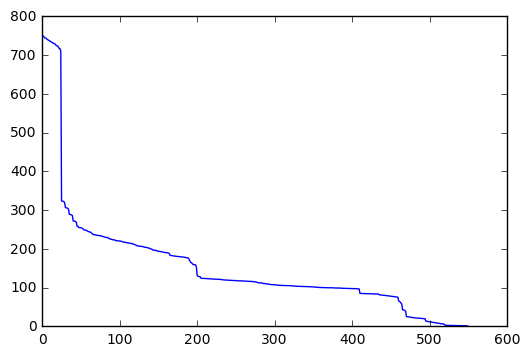

In [18]:
%matplotlib inline  

np.random.seed(0)

# We want to rank all attributes, and the best ones will be selected later
selector = SelectKBest(f_regression, k="all")
selector.fit(Xtrain, ytrain)

sorted_attributes = np.argsort(-selector.scores_)
sorted_scores = np.sort(-selector.scores_)

for index,element in enumerate(zip(sorted_attributes, sorted_scores)):
    print element
    if index>25: break
        
plt.plot(-sorted_scores)
plt.show()

It seem that the first 23 attributes are the most correlated with the
label. Let's see what happens if we select them. 

In [19]:
# Select the first 23 best attributes
Xtrainnew = Xtrain[:, sorted_attributes[0:23]]
Xvalnew = Xval[:, sorted_attributes[0:23]]


Lets evaluate the error with only these 23 attributes

In [20]:
#Define the decision tree regresor with tunned hyper parameter
np.random.seed(0)

#The decision tree object
clft = tree.DecisionTreeRegressor(max_depth=6)

fitted_clft = clft.fit(Xtrainnew, ytrain)

y_test_pred = fitted_clft.predict(Xvalnew)

print "MAE  is {}".format(mae(y_test_pred, yval))

MAE  is 498.858004242



Now we will do a "hyper parameter tunning" (by our own without using any function of SKLearn), this is to find the number of attributes where the error is either less or similar to the first result. 


Given the previous result, we will start at 23 attributes at try until 400 attributes according to their score. 

In [35]:

np.random.seed(0)

best_mae = 100000
best_num_attr = -1

for num_attribute in range(23,400):
    # Select the first n best attributes
    Xtrainnew_tuned = Xtrain[:, sorted_attributes[0:num_attribute]]
    Xvalnew_tuned = Xval[:, sorted_attributes[0:num_attribute]]

    #Define the decision tree regresor with tunned hyper parameter
    clft_tuned = tree.DecisionTreeRegressor(max_depth=6)

    fitted_clft_tuned = clft_tuned.fit(Xtrainnew_tuned, ytrain)

    y_test_pred_tuned = fitted_clft_tuned.predict(Xvalnew_tuned)

    tmp_mae = mae(y_test_pred_tuned, yval)
    
    if (tmp_mae < best_mae):
        best_mae = tmp_mae
        best_num_attr = num_attribute
        

print "Best MAE  is {}".format(best_mae)
print "best number of attributes is " + str(best_num_attr)

Best MAE  is 312.621690458
best number of attributes is 278


Now we are going to construct a pipeline of an attribute selector + a decision tree regressor. 

In [39]:
from sklearn.pipeline import Pipeline

np.random.seed(0)

#Define what to tune
param_grid_pipe = {'feature_selection__k': np.arange(Xtrain.shape[1])+1,
              'regression__max_depth': np.arange(6)+1}

#Define the pipeline
pipe_clf = Pipeline([
  ('feature_selection', SelectKBest(f_regression)),
  ('regression', tree.DecisionTreeRegressor())
])

#Define the partitions
partitions = [(indicesTrain, indicesVal)]

#
clf_grid = GridSearchCV(pipe_clf, 
                        param_grid = param_grid_pipe,
                        scoring='neg_mean_absolute_error',
                        cv=partitions,
                        verbose=1,
                        n_jobs=-1)

#Fit the whole data to find the tuned parameters
%time _ = clf_grid.fit(Xava, yava)


Fitting 1 folds for each of 3300 candidates, totalling 3300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3300 out of 3300 | elapsed:  6.4min finished


CPU times: user 2min 40s, sys: 524 ms, total: 2min 41s
Wall time: 6min 24s


In [40]:
print clf_grid.best_params_, -clf_grid.best_score_

{'feature_selection__k': 549, 'regression__max_depth': 5} 309.921914867


We obtain the that the best number of attributes is 549 (almost all of them!) with a max_depth = 5

To verify this result we can run our own "hyper parameter tunning" (similar to before) of the number of attributes to be selected. We find we obtain a similar result. 

In [28]:
np.random.seed(0)

best_mae = 100000
best_num_attr = -1

# We want to rank all attributes, and the best ones will be selected later
selector = SelectKBest(f_regression, k="all")
selector.fit(Xtrain, ytrain)

sorted_attributes = np.argsort(-selector.scores_)
sorted_scores = np.sort(-selector.scores_)

for num_attribute in range(23,550):
    # Select the first n best attributes
    Xtrainnew_tuned = Xtrain[:, sorted_attributes[0:num_attribute]]
    Xvalnew_tuned = Xval[:, sorted_attributes[0:num_attribute]]

    #Define the decision tree regresor with tunned hyper parameter
    clft_tuned = tree.DecisionTreeRegressor(max_depth=5)

    fitted_clft_tuned = clft_tuned.fit(Xtrainnew_tuned, ytrain)

    y_test_pred_tuned = fitted_clft_tuned.predict(Xvalnew_tuned)

    tmp_mae = mae(y_test_pred_tuned, yval)
    
    if (tmp_mae < best_mae):
        best_mae = tmp_mae
        best_num_attr = num_attribute
        

print "Best MAE  is {}".format(best_mae)
print "best number of attributes is " + str(best_num_attr)

Best MAE  is 309.982917116
best number of attributes is 543


<b> Final Model </b> 

Now that we have used the traning Set to train our model and the validation Set to find the best attributes of the model, we will use the Test Set to validate the accuracy of our final model. 

Both the training data and test data will be reduced, leaving only the best 543 attributes, to test the final model. 

In [22]:

#Training final model
np.random.seed(0)

XFinalTrainReduced = Xtrain[:, sorted_attributes[0:543]]
XTestReduce        = Xtest[:, sorted_attributes[0:543]]

#Define the decision tree regresor with tunned hyper parameter
clft_tuned = tree.DecisionTreeRegressor(max_depth=5)

fitted_clft_tuned = clft_tuned.fit(XFinalTrainReduced, ytrain)

y_test_final = fitted_clft_tuned.predict(XTestReduce)

print "MAE for final model is {}".format(mae(y_test_final, ytest))

MAE for final model is 329.970213788


<b> Conclusion </b>

Using a model with 550 attributes we obtain a MAE of 315.
Reducing the model to 543 attributes we obtain a MAE of 329 with training with the Training Set and testing with the TestSet. 

Thus we can conclude that we do not obtain a better model using less variables. 



<b> Sotavento </b>

Is it enough to have the attributes for the actual Sotavento location? (13th in the grid)
First lets extract the data corresponding to the 13th grid and train and model with it.


In [27]:

#Extracting data

sotavento = data.filter(regex='energy|.*13', axis=1)

sotavento.head()


energy    p54.162.13  p55.162.13    cape.13    p59.162.13  lai_lv.13  \
0   402.71  2.510824e+06    9.186295  13.527577  1.386937e+06   2.344111   
1   696.80  2.513173e+06    8.849569   6.896412  1.153526e+06   2.343719   
2  1591.15  2.509627e+06    7.924080   4.774439  1.098754e+06   2.343300   
3  1338.62  2.510571e+06    6.922709   0.000000  1.076021e+06   2.342830   
4   562.50  2.505664e+06    6.646282   0.000000  1.070830e+06   2.342437   

   lai_hv.13   u10n.13   v10n.13         sp.13    ...         t2m.13  \
0   2.432983 -0.757587 -1.922799  99846.319914    ...     280.473098   
1   2.432838 -1.412620 -1.403011  99917.733093    ...     278.286616   
2   2.432704 -2.290185 -0.754580  99764.378681    ...     277.206490   
3   2.432514 -3.497855  1.271028  99672.670459    ...     280.926600   
4   2.432369 -0.971249  0.553060  99372.811211    ...     277.363875   

      stl2.13     stl3.13   iews.13   inss.13     stl4.13    fsr.13   flsr.13  \
0  281.042026  281.462478 -0.057958 -0.138650  284.684755  0.404731 -5.927092   
1  280.747406  281.486541 -0.103576 -0.083050  284.667948  0.404920 -5.913881   
2  280.114863  281.487095 -0.165721 -0.036241  284.651914  0.405704 -5.908272   
3  279.991138  281.472435 -0.275550  0.098192  284.636266  0.403967 -5.961995   
4  280.576898  281.473265 -0.056553  0.041844  284.620232  0.403808 -5.987860   

    u100.13   v100.13  
0 -1.780562 -4.443617  
1 -3.743344 -3.129469  
2 -5.097203 -1.157748  
3 -4.500835  1.502478  
4 -3.392324  2.131114  

[5 rows x 23 columns]

Now that we have extracted the data, lets proceed to calculate the model. 

In [28]:
sot_matrix = sotavento.as_matrix()

print sot_matrix

[[  4.02710000e+02   2.51082398e+06   9.18629487e+00 ...,  -5.92709161e+00
   -1.78056188e+00  -4.44361684e+00]
 [  6.96800000e+02   2.51317348e+06   8.84956868e+00 ...,  -5.91388100e+00
   -3.74334366e+00  -3.12946896e+00]
 [  1.59115000e+03   2.50962664e+06   7.92407982e+00 ...,  -5.90827229e+00
   -5.09720273e+00  -1.15774821e+00]
 ..., 
 [  2.24060000e+02   2.43377838e+06   1.66769281e+01 ...,  -5.97747732e+00
   -2.65837313e+00   2.44992202e+00]
 [  3.70000000e-01   2.44029373e+06   1.64160838e+01 ...,  -5.99349228e+00
   -1.49807196e+00   1.32336700e+00]
 [  7.01400000e+01   2.44411168e+06   1.60393841e+01 ...,  -5.99052568e+00
   -1.67279721e+00  -6.63321269e-01]]


Define Training, validation and Test Data. 

In [29]:
#Extract traininig matrix

XSot = sot_matrix[:,1:]  #Gets the matrix from column 1 forward

XtrainSot = sot_matrix[indicesTrain,1:] #Gets the X matrix of traning data using the training indices

#Extract validation matrix
XvalSot = sot_matrix[indicesVal,1:]    #Gets the X matrix of validation data using the validation indices

#Extract test matrix
XtestSot = sot_matrix[indicesTest,1:] 

Lets Train a model with the Train and Validation data Sets of Sotavento. 

In [30]:
#Define the decision tree regresor with tunned hyper parameter
np.random.seed(0)

clft_sot = tree.DecisionTreeRegressor()

fitted_clft_sot = clft_sot.fit(XtrainSot, ytrain)

y_test_pred_sot = fitted_clft_sot.predict(XvalSot)

print "MAE of Sotavento is {}".format(mae(y_test_pred_sot, yval))

MAE of Sotavento is 384.35551963


Now Lets do a hyper-parameter tunning For the Sotavento Data Set. 

In [31]:

np.random.seed(0)

param_grid = {'max_depth': range(2,30, 2)}

#Define the partitions
partitions = [(indicesTrain, indicesVal)]

#Define the tree object
clfTunning = tree.DecisionTreeRegressor()

#Do the grid search
clf = GridSearchCV(clfTunning, 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions )

#Fit with the whole dataset
%time _ = clf.fit(XSot,yava)

#Print 
print "Best Max_Depth: {} and MAE for best Max_Depth: {}".format(clf.best_params_, -clf.best_score_)

CPU times: user 652 ms, sys: 0 ns, total: 652 ms
Wall time: 652 ms
Best Max_Depth: {'max_depth': 6} and MAE for best Max_Depth: 310.709580095


Now lets train the model with the whole Sotavento DataSet.
Our model has been trained using the Sotavento Training set and used the validation dataSet to find the best parameters. 
To obtain the final model we test the model with the best attributes againts the Sotavento Test Data Set. 

In [32]:
#Define the decision tree regresor with tunned hyper parameter
np.random.seed(0)


#Define Decision Tree regressor
clft_sot_final = tree.DecisionTreeRegressor(max_depth=6)

#Fit
fitted_clft_sot_final = clft_sot_final.fit(XtrainSot, ytrain)

#Predict
y_test_pred_sot_final = fitted_clft_sot_final.predict(XtestSot)

#Print error
print "MAE  is {}".format(mae(y_test_pred_sot_final, ytest))

MAE  is 326.191500102


<b> Conclusion </b>

Using the whole data set:
For the Sotavento we obtain a MAE of 326.
For the 539 best attributes we obtain a MAE of 329
And for the full model of 550 variables we obtain a MAE of 315. 

Thus we can conlude that just leaving the Satovento data Set is not enough to obtain the best model, thus it is better to use all the variables.